### CUSTOMER ATTRITION PREDICTION USING AN ARTIFICIAL NEURAL NETWORK

### A bank dataset is used to predict the likelihood of a customer to leave a bank based on certain factors

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [84]:
df = pd.read_csv('Downloads\\archive (1)\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
df.shape

(10000, 14)

In [86]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [87]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9191,572,France,Male,30,6,117696.67,1,1,0,100843.82,0
7298,620,France,Male,28,9,71902.52,1,0,1,190208.23,0
9900,646,Germany,Male,39,6,121681.91,2,0,1,61793.47,0


In [88]:
exited_no = df[df.Exited==0].Tenure
exited_yes = df[df.Exited==1].Tenure

## Data Visualization

### 1. Customer attrition based on their tenure

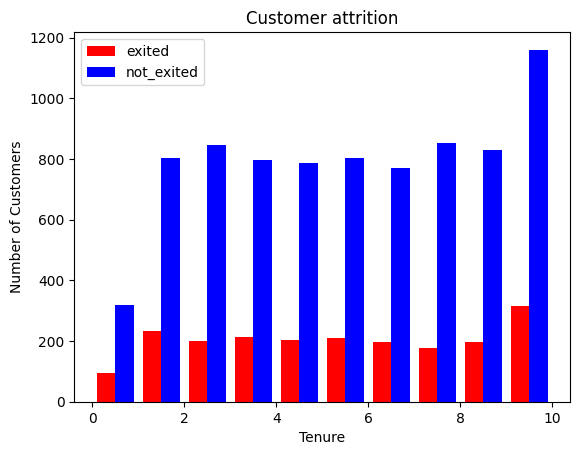

In [89]:
plt.hist([exited_yes,exited_no],color=['red','blue'],label=['exited','not_exited'])

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

### 2. Customer attrition based on their credit score

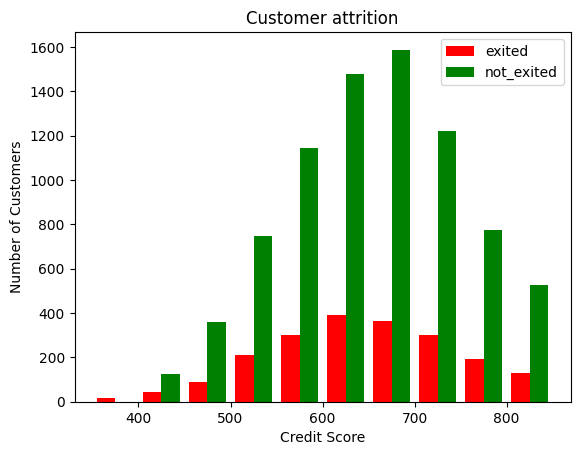

In [90]:
exited_no = df[df.Exited==0].CreditScore
exited_yes = df[df.Exited==1].CreditScore

plt.hist([exited_yes,exited_no],color=['red','green'],label=['exited','not_exited'])

plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

### 3. Customer attrition based on Geography

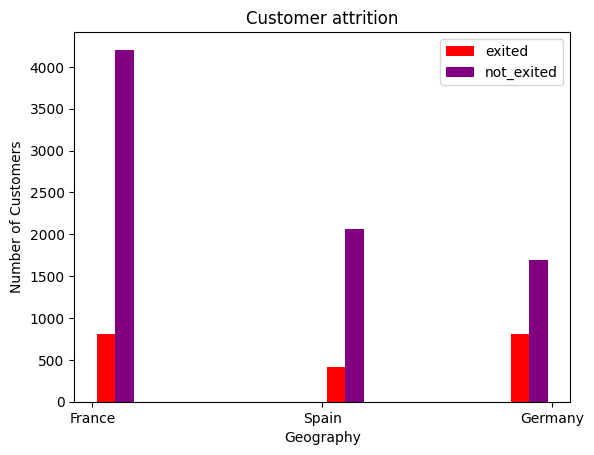

In [91]:
exited_no = df[df.Exited==0].Geography
exited_yes = df[df.Exited==1].Geography

plt.hist([exited_yes,exited_no],color=['red','purple'],label=['exited','not_exited'])
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

### 4. Customer attrition based on Estimated Salary

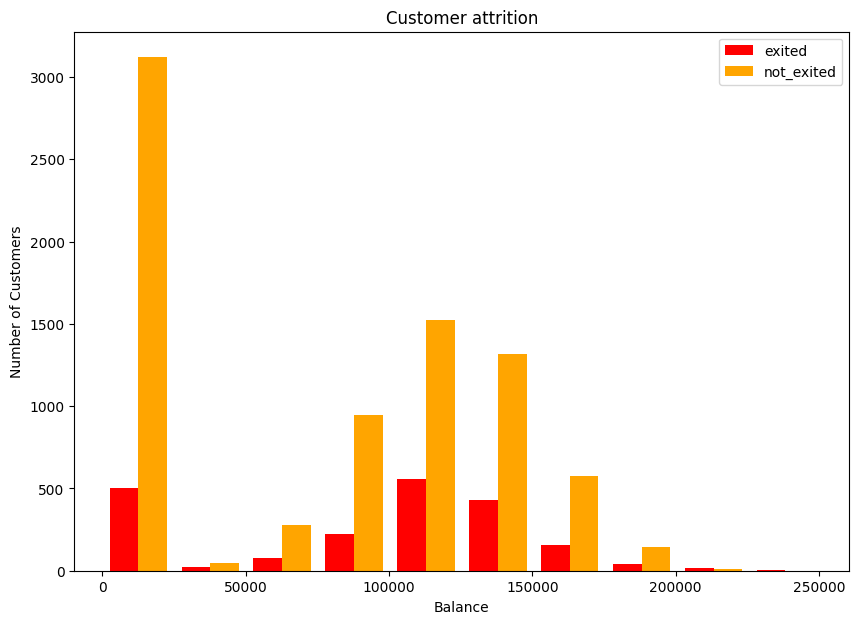

In [92]:
exited_no = df[df.Exited==0].Balance
exited_yes = df[df.Exited==1].Balance

plt.figure(figsize=(10,7))
plt.hist([exited_yes,exited_no],color=['red','orange'],label=['exited','not_exited'])
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

## Data cleaning and Preprocessing

In [93]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [94]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7320,850,Germany,Female,31,1,130089.56,2,1,1,4466.21,0
9253,644,Spain,Male,49,10,0.00,2,1,1,145089.64,0
587,725,France,Male,44,5,0.00,1,1,1,117356.14,0
9559,705,Spain,Female,39,8,144102.32,1,1,1,11682.36,0


### 1. Converting the string columns to float

In [95]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})

C:\Users\Joepr\AppData\Local\Temp\ipykernel_15576\1879725160.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})


In [96]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [97]:
# converting the column by one hot encoding
df = pd.get_dummies(data=df,columns=['Geography'],dtype='b')

In [98]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

### 2. Scaling

In [99]:
columns_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [100]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6731,0.306,1,0.189189,0.4,0.000000,0.333333,1,1,0.765200,0,1,0,0
7348,0.196,1,0.094595,0.2,0.000000,0.333333,0,0,0.476066,0,0,0,1
3840,0.778,1,0.540541,0.1,0.440808,0.000000,0,1,0.800632,1,0,1,0


## Model Training and predictions

In [101]:
X = df.drop('Exited',axis=1)
y = df.Exited

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [103]:
len(X_train), len(X_test)

(8000, 2000)

In [104]:
import tensorflow as tf
from tensorflow import keras

In [105]:
X_train.shape

(8000, 12)

In [106]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(24,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100)

C:\Users\Joepr\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.6650 - loss: 0.6055
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8028 - loss: 0.4611
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8136 - loss: 0.4355
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8158 - loss: 0.4307
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8261 - loss: 0.4228
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8219 - loss: 0.4283
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8302 - loss: 0.4138
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8303 - loss: 0.4097
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.8268 - loss: 0.4155
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8276 - loss: 0.4136
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8293 - loss: 0.4001
Epoch 12/100
250/250 ━━━━━

In [107]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8457 - loss: 0.3551


[0.3486607074737549, 0.8500000238418579]

In [108]:
y_predicted = model.predict(X_test)
y_predicted[:6]

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[0.03921207],
       [0.07112207],
       [0.06267339],
       [0.07030121],
       [0.05465808],
       [0.15641299]], dtype=float32)

In [109]:
y_pred = []
for value in y_predicted:
    if value > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [110]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [111]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

Text(50.722222222222214, 0.5, 'Truth')

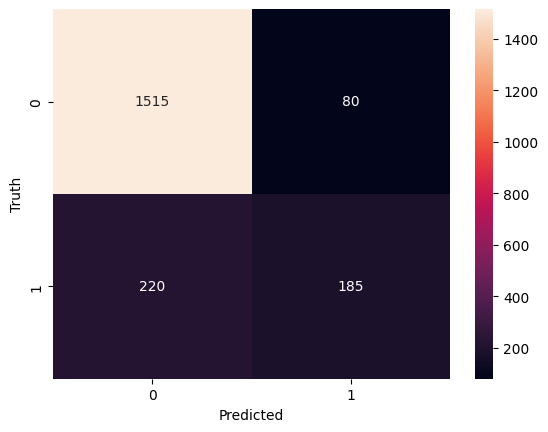

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test,y_pred)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.46      0.55       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

